<a href="https://colab.research.google.com/github/yejikwon7/DeepLearning/blob/main/NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLTK를 이용한 전처리

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize # 단어 토큰화

text = "This is a dog."
print(word_tokenize(text))

['This', 'is', 'a', 'dog', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.tokenize import sent_tokenize # 문장 토큰화

text = "This is a house. This is a dog."
print(sent_tokenize(text))

['This is a house.', 'This is a dog.']


In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords # 불용어
print(stopwords.words('english')[:20]) # 불용어 확인하기

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

text = "I was wondering if anyone out there could enlighen me on this car."

shortword = re.compile(r'\W*\b\w{1,2}\b') # 단어 1~2개짜리 제거
print(shortword.sub('', text))

 was wondering anyone out there could enlighen this car.


케라스를 이용한 전처리

In [ ]:
from tensorflow.keras.preprocessing.text import * # text 전처리

print(text_to_word_sequence("This is a dog."))

['this', 'is', 'a', 'dog']


one-hot encoding : 케라스에서 원-핫 인코딩 만들기

In [ ]:
import numpy as np
from keras.utils import to_categorical # to_categorical 사용해 one-hot encoding 만듦

# 우리가 변환하고 싶은 텍스트
text = ["cat", "dog", "cat", "bird"]

# 단어 집합(말뭉치, corpus)
total_pets = ["cat", "dog", "turtle", "fish", "bird"] # 정수화 되어있는 순서
print("text= ", text)

# 변환에 사용되는 딕셔너리를 만든다
mapping = {}
for x in range(len(total_pets)):
  mapping[total_pets[x]] = x # "cat" -> 0, "dog" -> 1, ...
  # 숫자와 mapping: 순서(위치)에 따라 숫자 부여
print(mapping)

# 단어들을 순차적인 정수 인덱스로 만든다
for x in range(len(text)):
  text[x] = mapping[text[x]] # dictionary

print("text= ", text)

# 순차적인 정수 인덱스를 원-핫 인코딩으로 만든다
one_hot_encode = to_categorical(text) # 변환
print("text= ", one_hot_encode)

text=  ['cat', 'dog', 'cat', 'bird']
{'cat': 0, 'dog': 1, 'turtle': 2, 'fish': 3, 'bird': 4}
text=  [0, 1, 0, 4]
text=  [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


keras에서의 자연어 처리

In [ ]:
# 전처리와 토큰화
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer() # 단어 집합 만듦
text = """Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representatino learning."""

t.fit_on_texts([text]) # 각 단어마다 정수화
print("단어집합: ", t.word_index)

단어집합:  {'learning': 1, 'of': 2, 'deep': 3, 'is': 4, 'part': 5, 'a': 6, 'broader': 7, 'family': 8, 'machine': 9, 'methods': 10, 'based': 11, 'on': 12, 'artificial': 13, 'neural': 14, 'networks': 15, 'with': 16, 'representatino': 17}


In [ ]:
# 텍스트의 정수 인코딩
seq = t.texts_to_sequences([text])[0] # text 기반의 시퀀스로 출력
print(text, "-> ", seq)

Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representatino learning. ->  [3, 1, 4, 5, 2, 6, 7, 8, 2, 9, 1, 10, 11, 12, 13, 14, 15, 16, 17, 1]


In [ ]:
# 샘플의 패딩: 크기 나눠야 input 크기 결정됨, 심플 길이 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences([[7, 8, 9], [1, 2, 3, 4, 5], [7]], maxlen=3, padding='pre') # 입력은 동일 크기로 주어야 하므로 길이 규정: 3
print(X)

[[7 8 9]
 [3 4 5]
 [0 0 7]]


In [ ]:
import numpy as np
from tensorflow.keras.layers import Embedding # kears는 임베딩이라는 layer 가짐 # layer통해 데이터 임베딩
from tensorflow.keras.models import Sequential

# 입력 형태: (batch_size, input_length)=(32, 3)
# 출력 형태: (None, 3, 4)
model = Sequential()
model.add(Embedding(100, 4, input_length=3)) # 한 단어 당 4개짜리 밀집 벡터 생성

input_array = np.random.randint(100, size=(32, 3))
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array) # 모델 예측
print(output_array.shape)
# 독립적으로 만들어진 형태

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
(32, 3, 4)


IMDB 데이터셋의 분류

In [ ]:
from tensorflow.keras.datasets import imdb # 정수화된 상태
from tensorflow.keras.models import Sequential # 모델 구성
from tensorflow.keras.layers import Dense, Flatten, Embedding # dense로 간단한 신경망으로 분류 # 임베딩된 벡터 기반으로 flatten, dense 사용해 감정 분류
from tensorflow.keras import preprocessing # text 전처리

dic_siz = 10000 # 사전의 크기(사전에 있는 단어 개수): 한정
sample_siz = 512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim = 16 # 16차원의 임베딩 공간: 각 단어마다 16개의 밀집 벡터 가짐

# padding으로 서로 다른 문장의 길이를 맞춰주는 것
# 동일하게 0으로 패딩하게 되는데, 문장 앞쪽에 패딩 수행
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=sample_siz) # 512개로 길이 맞춤: 하나의 문장 안에 512개의 단어만 갖도록
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=sample_siz)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
391/391 - 5s - 13ms/step - accuracy: 0.7700 - loss: 0.4444 - val_accuracy: 0.8712 - val_loss: 0.2956
Epoch 2/20
391/391 - 2s - 4ms/step - accuracy: 0.9317 - loss: 0.1803 - val_accuracy: 0.8609 - val_loss: 0.3353
Epoch 3/20
391/391 - 1s - 4ms/step - accuracy: 0.9839 - loss: 0.0611 - val_accuracy: 0.8646 - val_loss: 0.3785
Epoch 4/20
391/391 - 3s - 7ms/step - accuracy: 0.9973 - loss: 0.0158 - val_accuracy: 0.8576 - val_loss: 0.4596
Epoch 5/20
391/391 - 1s - 4ms/step - accuracy: 0.9997 - loss: 0.0040 - val_accuracy: 0.8588 - val_loss: 0.5116
Epoch 6/20
391/391 - 2s - 6ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.8584 - val_loss: 0.5462
Epoch 7/20
391/391 - 1s - 3ms/step - accuracy: 1.0000 - loss: 8.1635e-04 - val_accuracy: 0.8607 - val_loss: 0.5723
Epoch 8/20
391/391 - 1s - 3ms/step - accuracy: 1.0000 - loss: 4.8604e-04 - val_accuracy: 0.8615 - val_loss: 0.5945
Epoch 9/20
391/391 - 3s - 9ms/step - accuracy: 1.0000 - loss: 3.2827e-04 - val_accuracy: 0.8618 - val_l

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 512, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,266,629 (4.83 MB)

 Trainable params: 422,209 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844,420 (3.22 MB)

정확률은  86.29599809646606


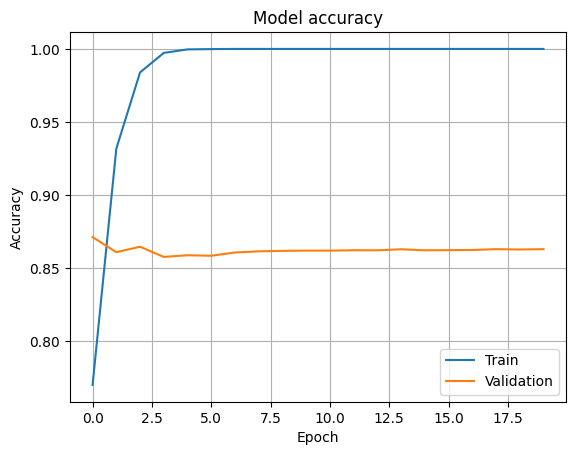

In [ ]:
# 신경망 모델 설계와 학습
embed = Sequential() # 모델 구성
# input_dim 차원을 output_dim 차원으로 축소 시킴
embed.add(Embedding(input_dim=dic_siz, output_dim=embed_space_dim, input_length=sample_siz)) # 임베딩 layer 붙음
embed.add(Flatten()) # input_length * output_dim 구조의 텐서를 일렬로 펼침
embed.add(Dense(32, activation='relu')) # 은닉층
embed.add(Dense(1, activation='sigmoid')) # Dense 구조: 다층 퍼셉트론을 적용 # output 1개 # 감정분류 : 긍/부 여부
embed.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist=embed.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=2) # 임베딩된 모델 fitting

embed.summary()

# 모델 평가
res = embed.evaluate(x_test, y_test, verbose=0)
print("정확률은 ", res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz = 10000 # 사전의 크기(사전에 있는 단어 개수): 한정
sample_siz = 512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=dic_siz)

embed_space_dim = 16 # 16차원 임베딩 공간

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=sample_siz)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=sample_siz)

early = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# earlystopping: validation에 변화 없었기 때문
# val_accuracy검증 집합에 대한 정확률을 조기 멈춤 기준으로 사용
# patience: 5세대 동안 성능 향상 없으면 멈춤(과정 얼마나 체크할지)
# restore_best_weights: 가장 높은 성능을 발휘했을 때의 가중치 취함(5 epoch 중)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed = Sequential()
embed.add(Embedding(input_dim=dic_siz, output_dim=embed_space_dim, input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1, activation='sigmoid'))
embed.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
hist = embed.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early])
# 0.2: 훈련 집합의 20%를 떼어 검증 집합으로 사용
# callbacks: 콜백 함수를 통해 조기 멈춤 적용

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 - 12s - 38ms/step - accuracy: 0.7476 - loss: 0.5022 - val_accuracy: 0.8318 - val_loss: 0.3957
Epoch 2/20
313/313 - 7s - 22ms/step - accuracy: 0.8922 - loss: 0.2750 - val_accuracy: 0.8774 - val_loss: 0.3027
Epoch 3/20
313/313 - 10s - 31ms/step - accuracy: 0.9204 - loss: 0.2083 - val_accuracy: 0.8776 - val_loss: 0.3191
Epoch 4/20
313/313 - 11s - 34ms/step - accuracy: 0.9416 - loss: 0.1637 - val_accuracy: 0.8788 - val_loss: 0.3162
Epoch 5/20
313/313 - 6s - 19ms/step - accuracy: 0.9410 - loss: 0.1594 - val_accuracy: 0.8764 - val_loss: 0.3281
Epoch 6/20
313/313 - 10s - 33ms/step - accuracy: 0.9443 - loss: 0.1489 - val_accuracy: 0.8326 - val_loss: 0.4326
Epoch 7/20
313/313 - 5s - 16ms/step - accuracy: 0.9590 - loss: 0.1168 - val_accuracy: 0.8712 - val_loss: 0.3893
Epoch 8/20
313/313 - 7s - 21ms/step - accuracy: 0.9681 - loss: 0.0943 - val_accuracy: 0.8716 - val_loss: 0.4217
Epoch 9/20
313/313 - 9s - 30ms/step - accuracy: 0.9773 - loss: 0.0698 - val_accuracy: 0.8716 - val_loss: 0.5212

Epoch 1/20
391/391 - 5s - 13ms/step - accuracy: 0.7685 - loss: 0.4393 - val_accuracy: 0.8706 - val_loss: 0.3012
Epoch 2/20
391/391 - 3s - 9ms/step - accuracy: 0.9325 - loss: 0.1805 - val_accuracy: 0.8638 - val_loss: 0.3262
Epoch 3/20
391/391 - 1s - 3ms/step - accuracy: 0.9823 - loss: 0.0642 - val_accuracy: 0.8597 - val_loss: 0.3905
Epoch 4/20
391/391 - 2s - 4ms/step - accuracy: 0.9964 - loss: 0.0188 - val_accuracy: 0.8490 - val_loss: 0.4749
Epoch 5/20
391/391 - 4s - 9ms/step - accuracy: 0.9995 - loss: 0.0054 - val_accuracy: 0.8524 - val_loss: 0.5242
Epoch 6/20
391/391 - 2s - 5ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.8541 - val_loss: 0.5705
Epoch 7/20
391/391 - 1s - 3ms/step - accuracy: 1.0000 - loss: 8.4056e-04 - val_accuracy: 0.8552 - val_loss: 0.5868
Epoch 8/20
391/391 - 1s - 3ms/step - accuracy: 1.0000 - loss: 5.3301e-04 - val_accuracy: 0.8561 - val_loss: 0.6126
Epoch 9/20
391/391 - 1s - 3ms/step - accuracy: 1.0000 - loss: 3.4830e-04 - val_accuracy: 0.8549 - val_l

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 512, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,266,629 (4.83 MB)

 Trainable params: 422,209 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844,420 (3.22 MB)

정확률은  85.81200242042542


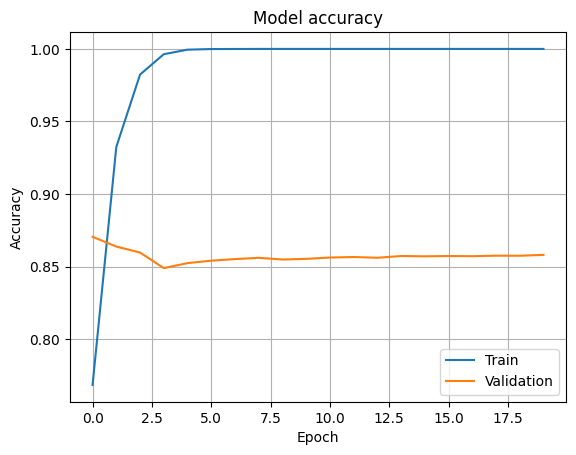

In [ ]:
# 신경망 모델 설계와 학습
embed = Sequential()

embed.add(Embedding(input_dim=dic_siz, output_dim=embed_space_dim, input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32, activation='relu'))
embed.add(Dense(1, activation='sigmoid'))
embed.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist=embed.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=2)

embed.summary()

# 모델 평가
res = embed.evaluate(x_test, y_test, verbose=0)
print("정확률은 ", res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()